# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!


## Problem Analysis

The main purpose of this analysis is to show actionable insights for the Head of Toyota Sales in the UK to deal with price mismatches for their used cars that arrive at the dealership.<br>
Why does this the problem?<br><br>
There are three reasons behind it.<br>
 1. Not sellable: Cars that are more than £1,500 above the estimated price will not sell, resulting in elongating the duration in stock.
 2. Losing profitable deals: Cars whose estimated prices are more than current pricing have been losing revenue that the dealerships were able to earn. 
 3. Unfair values for the customers: When the dealerships buy used cars from the users, they cannot propose a fair price. As a result of this, the customers become unsatisfactory.

Thus, calculating the reasonable estimated prices can resolve the problem, increasing customer satisfaction and profits at the dealership.<br>

In order to deal with this, I conduct analyses in the following step.
 1. Conduct Explanatory Data Analysis(EDA) based on the data
 2. Construct models for calculating fair prices and the evaluations
 3. Analyze results of the gaps between present prices and the estimated prices
 4. Propose actionable insights for the Toyota sales team in the UK
 

## Problem analysis for each stakeholder

 - Toyota - Unfair price could deteriorate brand image.
 - Consumer - Unfair pricing at dealerships makes customers unsatisfactory when they sell their cars.
 - Dealership - Unfair prices make the business difficult to do it.

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn libraries
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression(scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # stadard scaler
from sklearn.ensemble import RandomForestRegressor # random forest regressor

# import scipy libraries
from scipy import stats

# initial setting
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)

# time count to confirm performance
import datetime

# record time when this programs starts
time_st = datetime.datetime.now()

In [3]:
# import data
toyota_df = pd.read_csv('./data/toyota.csv')

In [4]:
# Confirm data
toyota_df.info()

# -> There is no null data in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
# Confirm data
toyota_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [6]:
# data check before
print('model', toyota_df['model'].unique().tolist())
print('year', toyota_df['year'].unique().tolist())
print('transmission', toyota_df['transmission'].unique().tolist())
print('fuelType', toyota_df['fuelType'].unique().tolist())
print('engineSize', toyota_df['engineSize'].unique().tolist())

model [' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR', ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO', ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ', ' Urban Cruiser']
year [2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003, 2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000, 1998]
transmission ['Manual', 'Automatic', 'Semi-Auto', 'Other']
fuelType ['Petrol', 'Other', 'Hybrid', 'Diesel']
engineSize [2.0, 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1.0, 1.3, 0.0, 2.4, 3.0, 2.8, 4.2, 4.5]


In [7]:
# data cleaning
# there is a space before alphabet
toyota_df['model'] = toyota_df['model'].str.strip()

In [8]:
# data check after cleaning
print('model', toyota_df['model'].unique().tolist())
print('year', toyota_df['year'].unique().tolist())
print('transmission', toyota_df['transmission'].unique().tolist())
print('fuelType', toyota_df['fuelType'].unique().tolist())
print('engineSize', toyota_df['engineSize'].unique().tolist())

model ['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR', 'Prius', 'Avensis', 'Verso', 'Hilux', 'PROACE VERSO', 'Land Cruiser', 'Supra', 'Camry', 'Verso-S', 'IQ', 'Urban Cruiser']
year [2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003, 2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000, 1998]
transmission ['Manual', 'Automatic', 'Semi-Auto', 'Other']
fuelType ['Petrol', 'Other', 'Hybrid', 'Diesel']
engineSize [2.0, 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1.0, 1.3, 0.0, 2.4, 3.0, 2.8, 4.2, 4.5]


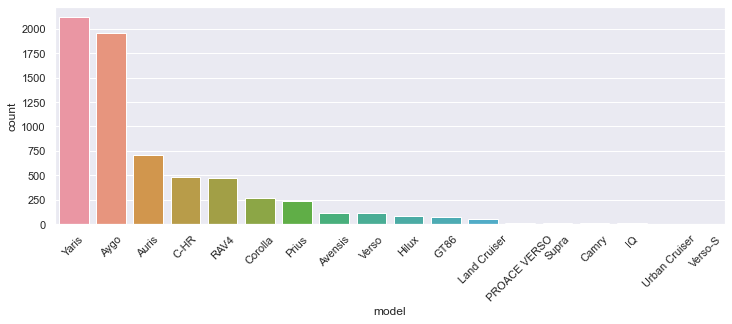

In [9]:
# EDA for confirming data distribution in the number of the appearances
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(ax=ax, x='model', order=toyota_df['model'].value_counts().index, data=toyota_df)
plt.xticks(rotation=45)
plt.show()

Although there are 18 models in the data, a distribution is not uniform.<br>
A few models account for the majority.

In [10]:
#data prepration to make pie chart
num_cars = toyota_df.groupby(by='model')['model'].count().sort_values(ascending=False).to_list()
num_others = np.sum(num_cars[5:])
num_cars_top5 = num_cars[:5]
num_cars_top5.append(num_others)
model_cars = toyota_df.groupby(by='model')['model'].count().sort_values(ascending=False).index.to_list()
model_cars_top5 = model_cars[:5]
model_cars_top5.append('other')

toyota_df_summary = pd.DataFrame(num_cars_top5, model_cars_top5, columns=['num'])

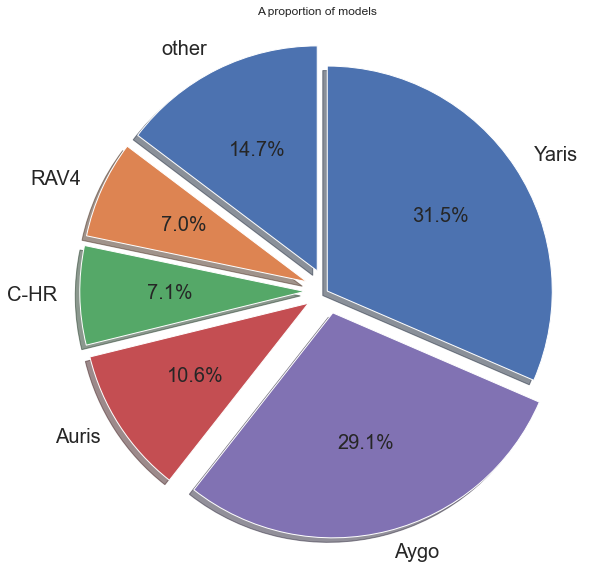

In [11]:
# EDA for a distribution of models
fig, ax = plt.subplots(figsize=(10, 10))

#define labels
labels = toyota_df_summary['num'].index[::-1].to_list()
textprops = {"fontsize":20}

#create pie chart
sizes = toyota_df_summary['num'][::-1].to_list()

#define Seaborn color palette to use
colors = sns.color_palette()[0:5]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)  # explode 1st slice

# Plot
ax.pie(sizes, labels=labels, colors = colors, explode=explode,
autopct='%1.1f%%', shadow=True, startangle=90, textprops=textprops)

plt.title('A proportion of models')
plt.axis('equal')
plt.show()

The top 5 models listed in the data account for more than 80% of the cars. <br>
Therefore, if there were actionable insights relating to these models, it would be benefitial for Toyota Sales Team to improve their financial performance.



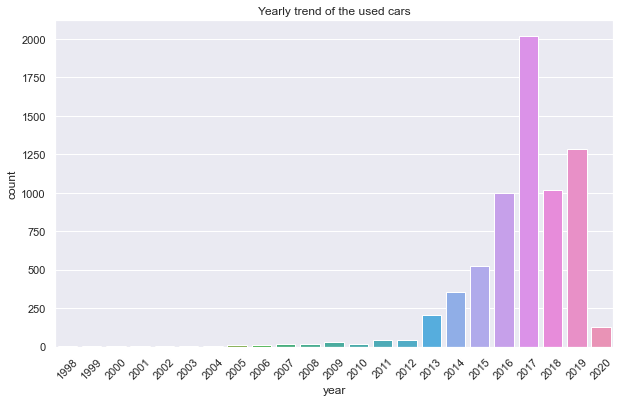

In [12]:
# EDA for year
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x="year", data=toyota_df)
plt.title('Yearly trend of the used cars')
plt.xticks(rotation=45)
plt.show()

In [13]:
#data prepration to make pie chart
num_years = toyota_df.groupby(by='year')['year'].count().sort_values(ascending=False).to_list()
num_others = np.sum(num_cars[5:])
num_years_top5 = num_years[:5]
num_years_top5.append(num_others)
year_cars = toyota_df.groupby(by='year')['year'].count().sort_values(ascending=False).index.to_list()
year_cars_top5 = year_cars[:5]
year_cars_top5.append('other')

toyota_df_year_summary = pd.DataFrame(num_years_top5, year_cars_top5, columns=['num'])

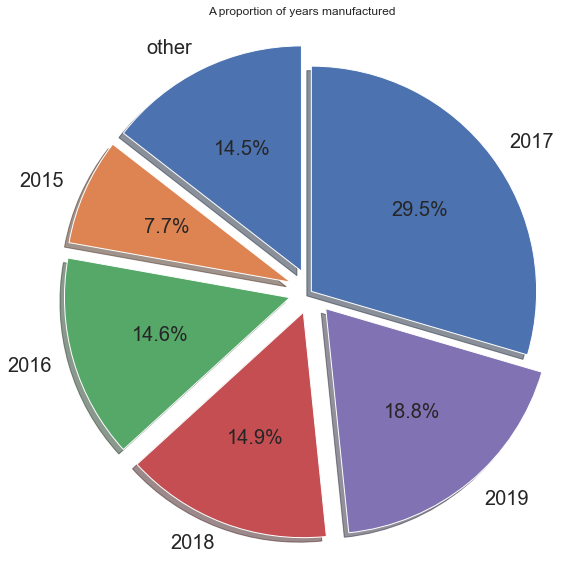

In [14]:
# EDA for a distribution of models
fig, ax = plt.subplots(figsize=(10, 10))

#define labels
labels = toyota_df_year_summary['num'].index[::-1].to_list()
textprops = {"fontsize":20}

#create pie chart
sizes = toyota_df_year_summary['num'][::-1].to_list()

#define Seaborn color palette to use
colors = sns.color_palette()[0:5]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)  # explode 1st slice

# Plot
ax.pie(sizes, labels=labels, colors = colors, explode=explode,
autopct='%1.1f%%', shadow=True, startangle=90, textprops=textprops)

plt.title('A proportion of years manufactured')
plt.axis('equal')
plt.show()

The volume zones of their used cars are in between 2016 and 2019.

In [15]:
# Feature engineering
# Not do this

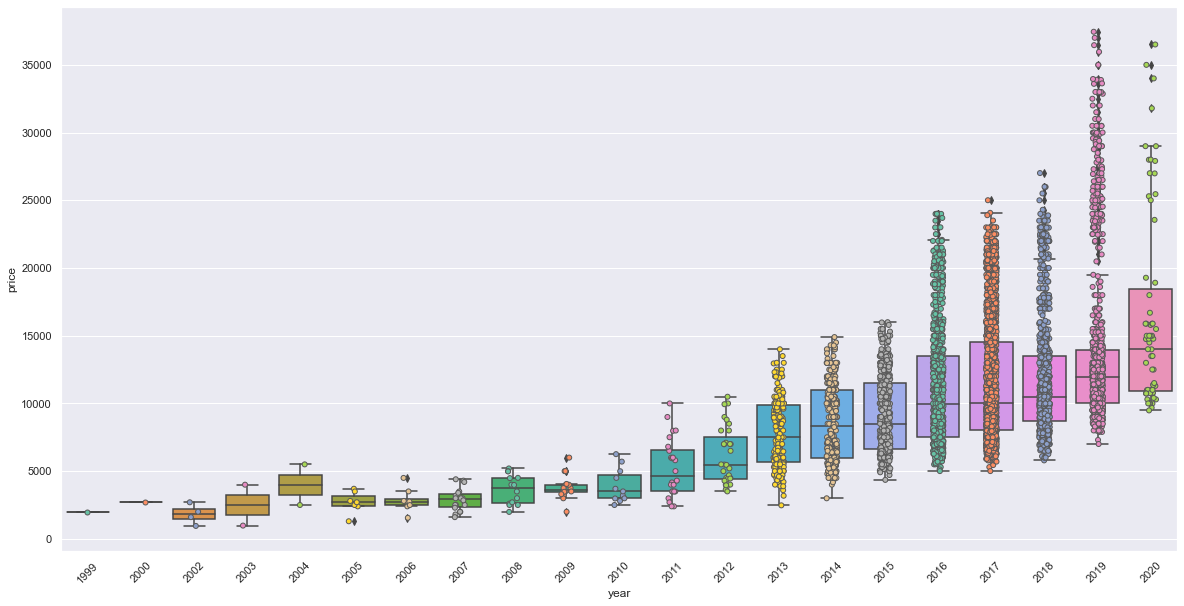

In [16]:
#filter for top5models
lst_top5models = ['Yaris', 'Aygo', 'Auris', 'C-HR', 'RAV4']

# EDA
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))

sns.stripplot(x="year", y="price", data=toyota_df[toyota_df['model'].isin(lst_top5models)], jitter=True, palette="Set2", split=True, linewidth=1,edgecolor='gray')
sns.boxplot(x='year', y='price', data=toyota_df[toyota_df['model'].isin(lst_top5models)])
plt.xticks(rotation=45)

plt.show()

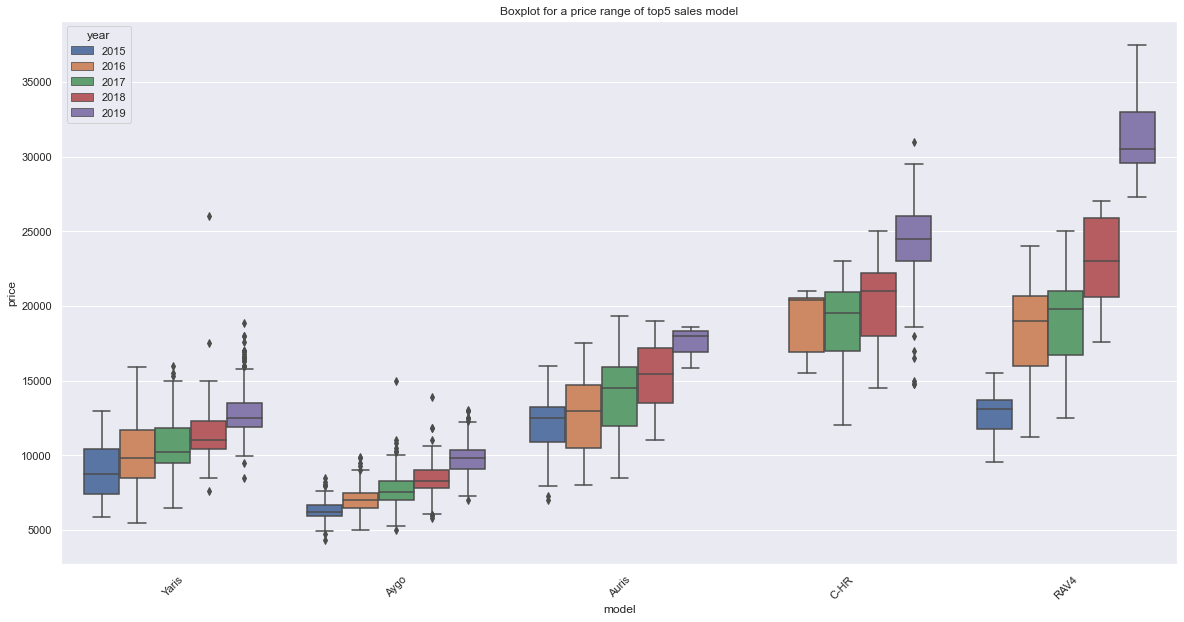

In [17]:
# An overall trend of top 5 models

#filter for top5models
lst_top5models = ['Yaris', 'Aygo', 'Auris', 'C-HR', 'RAV4']

# EDA
cond1 = toyota_df['model'].isin(lst_top5models)
cond2 = toyota_df['year'] >= 2015 
cond3 = toyota_df['year'] <= 2019

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))

#sns.stripplot(x="model", y="price", data=toyota_df[toyota_df['model'].isin(lst_top5models)], jitter=True, palette="Set2", split=True, linewidth=1,edgecolor='gray')
sns.boxplot(x="model", y='price', hue='year', order=['Yaris', 'Aygo', 'Auris', 'C-HR', 'RAV4'], data=toyota_df[cond1][cond2][cond3])
plt.title('Boxplot for a price range of top5 sales model')
plt.xticks(rotation=45)

plt.show()

There are two groups in the graph: these are (1) Yaris, Aygo, and Auris are between 5,000 and 20,000, (2)C-HR and RAV4 are between 10,000 and 40,000.

As the used cars become new, the number of the stocks increases. Moreover, the price range becomes wide.

Land Cruiser shows an unique distribution. Although the number of the samples is small, the samples disperses.<br>
In terms of cars at top sales, such as (1)Yaris, (2)Aygo, (3)Auris, (4)C-HR, and (5)RAV4, RAV4 shows wider distribution.



In [18]:
lst_top5models = ['Yaris', 'Aygo', 'Auris', 'RAV4', 'C-HR']
#lst_models = ['Yaris', 'Aygo', 'Auris']
lst_models = ['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR',
       'Prius', 'Avensis', 'Verso', 'Hilux', 'PROACE VERSO',
       'Land Cruiser', 'Supra', 'Camry', 'Verso-S', 'IQ', 'Urban Cruiser']
toyota_df_selected = toyota_df.loc[toyota_df['model'].isin(lst_models), :]

In [19]:
# set thretholds for outliers
stats_results = toyota_df_selected.groupby('model').describe()

cond_upperth = stats_results['price']['75%'] + 1.5*(stats_results['price']['75%'] - stats_results['price']['25%'])
cond_lowerth = stats_results['price']['25%'] - 1.5*(stats_results['price']['75%'] - stats_results['price']['25%'])

In [20]:
# set threthold values
for index, row in toyota_df_selected.iterrows():
    
    if row['model'] in lst_models:
        
        toyota_df_selected.loc[index, 'upper_th'] = cond_upperth[row['model']]
        toyota_df_selected.loc[index, 'lower_th'] = cond_lowerth[row['model']]


In [21]:
# special treatment for determining lower thresholds of Land Cruiser
toyota_df_selected.loc[toyota_df_selected['model']=='Land Cruiser', 'lower_th'] = 10000

In [22]:
# drop outliers
cond_outlier_upper = toyota_df_selected['price'] < toyota_df_selected['upper_th']
cond_outlier_lower = toyota_df_selected['price'] > toyota_df_selected['lower_th']

toyota_df_selected_wo_outlier = toyota_df_selected[cond_outlier_upper][cond_outlier_lower]

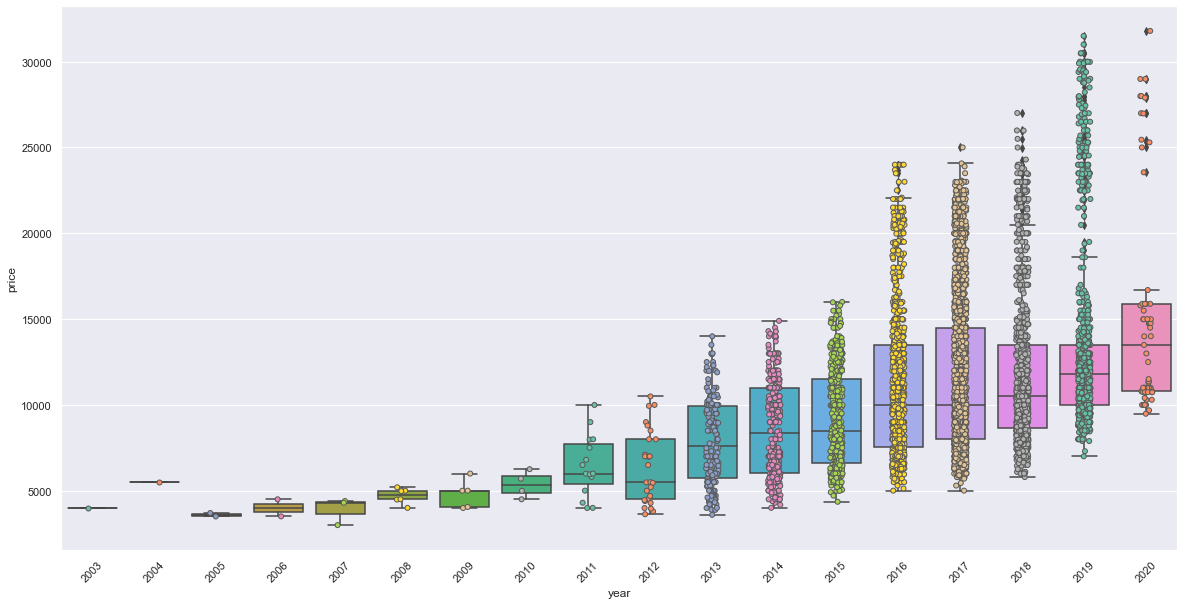

In [23]:
# EDA
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))

sns.stripplot(x="year", y="price", data=toyota_df_selected_wo_outlier.loc[toyota_df_selected_wo_outlier['model'].isin(lst_top5models)], jitter=True, palette="Set2", split=True, linewidth=1,edgecolor='gray')
sns.boxplot(x='year', y='price', data=toyota_df_selected_wo_outlier.loc[toyota_df_selected_wo_outlier['model'].isin(lst_top5models)])
plt.xticks(rotation=45)

plt.show()

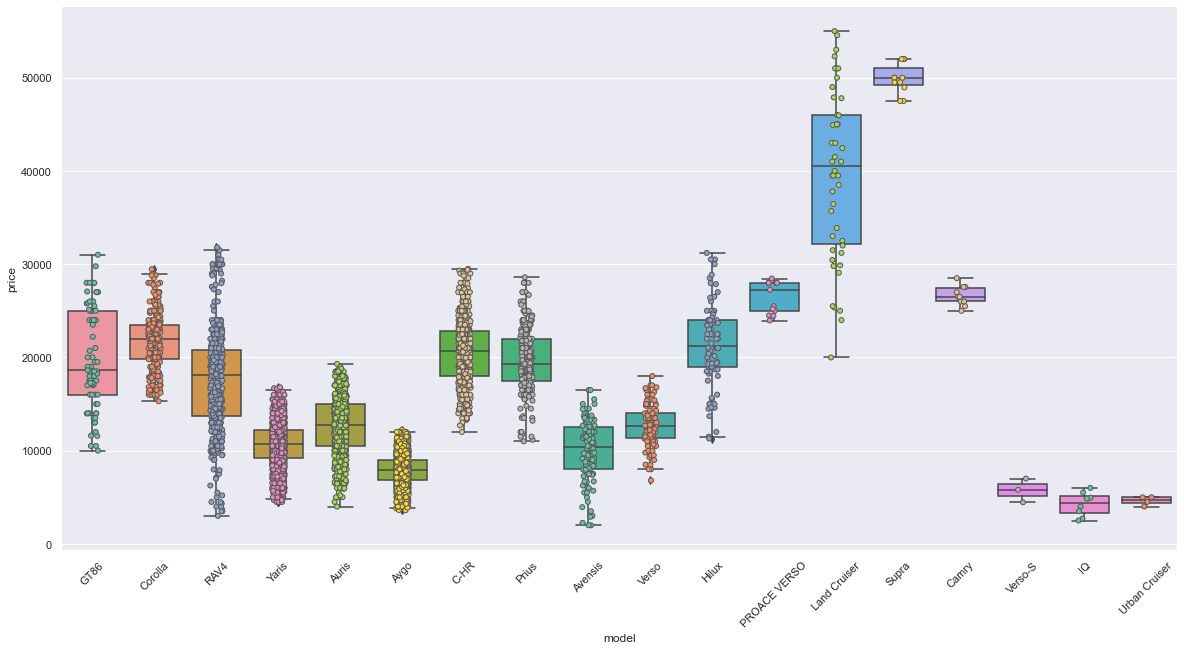

In [24]:
# EDA
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))

sns.stripplot(x="model", y="price", data=toyota_df_selected_wo_outlier, jitter=True, palette="Set2", split=True, linewidth=1,edgecolor='gray')
sns.boxplot(x="model", y='price', data=toyota_df_selected_wo_outlier)
plt.xticks(rotation=45)

plt.show()

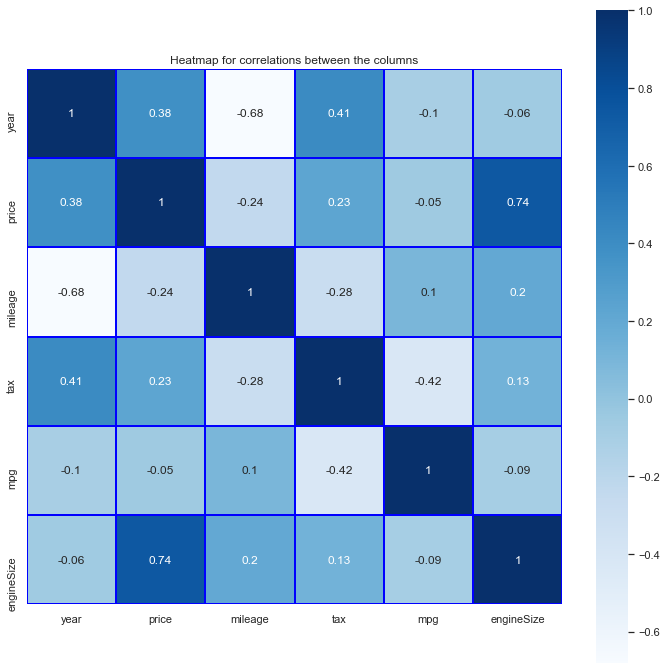

In [25]:
# calculate correlation matrix
toyota_corr = toyota_df_selected_wo_outlier.corr(method='pearson').round(decimals=2).iloc[0:-2, 0:-2]

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(12,12))


# developing a spicy heatmap
sns.heatmap(data       = toyota_corr, # the correlation matrix
            cmap       = 'Blues',     # changing to COOL colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'blue',       # lines between boxes
            linewidths = 1.0)          # how thick should the lines be?
plt.title('Heatmap for correlations between the columns')
plt.show()

Although year, tax, and engine size have positive correlations with price, mileage and mpg have negative correlations with the one.<br>
Based on this graph, mpg seems that it does not have significant impact on determining a price.<br>
Due to the reason shown above, I am going to use columns except mpg for models construction.<br>

The following One-way ANOVA test represents that model and price have strong correlationship.<br>
Thus, it is a good idea to use model column in a model construction process.

In [26]:
# one-way ANOVA test

# conditions for model
cond_GT86 = toyota_df_selected_wo_outlier['model'] == 'GT86'
cond_Corolla = toyota_df_selected_wo_outlier['model'] == 'Corolla'
cond_RAV4 = toyota_df_selected_wo_outlier['model'] == 'RAV4'
cond_Yaris = toyota_df_selected_wo_outlier['model'] == 'Yaris'
cond_Auris = toyota_df_selected_wo_outlier['model'] == 'Auris'
cond_Aygo = toyota_df_selected_wo_outlier['model'] == 'Aygo'
cond_CHR = toyota_df_selected_wo_outlier['model'] == 'C-HR'
cond_Prius = toyota_df_selected_wo_outlier['model'] == 'Prius'
cond_Avensis = toyota_df_selected_wo_outlier['model'] == 'Avensis'
cond_Verso = toyota_df_selected_wo_outlier['model'] == 'Verso'
cond_Hilux = toyota_df_selected_wo_outlier['model'] == 'Hilux'
cond_PROACE = toyota_df_selected_wo_outlier['model'] == 'PROACE VERSO'
cond_Land = toyota_df_selected_wo_outlier['model'] == 'Land Cruiser'
cond_Supra = toyota_df_selected_wo_outlier['model'] == 'Supra'
cond_Camry = toyota_df_selected_wo_outlier['model'] == 'Camry'
cond_VersoS = toyota_df_selected_wo_outlier['model'] == 'Verso-S'
cond_IQ = toyota_df_selected_wo_outlier['model'] == 'IQ'
cond_Urban = toyota_df_selected_wo_outlier['model'] == 'Urban Cruiser'

F, p = stats.f_oneway(toyota_df_selected_wo_outlier[cond_GT86].price,
                      toyota_df_selected_wo_outlier[cond_Corolla].price,
                      toyota_df_selected_wo_outlier[cond_RAV4].price,
                      toyota_df_selected_wo_outlier[cond_Yaris].price,
                      toyota_df_selected_wo_outlier[cond_Auris].price,
                      toyota_df_selected_wo_outlier[cond_Aygo].price,
                      toyota_df_selected_wo_outlier[cond_CHR].price,
                      toyota_df_selected_wo_outlier[cond_Prius].price,
                      toyota_df_selected_wo_outlier[cond_Avensis].price,
                      toyota_df_selected_wo_outlier[cond_Verso].price,
                      toyota_df_selected_wo_outlier[cond_Hilux].price,
                      toyota_df_selected_wo_outlier[cond_PROACE].price,
                      toyota_df_selected_wo_outlier[cond_Land].price,
                      toyota_df_selected_wo_outlier[cond_Supra].price,
                      toyota_df_selected_wo_outlier[cond_Camry].price,
                      toyota_df_selected_wo_outlier[cond_VersoS].price,
                      toyota_df_selected_wo_outlier[cond_IQ].price,
                      toyota_df_selected_wo_outlier[cond_Urban].price)

print(F, p)

1324.9735705748815 0.0


One way ANOVA test can confirm whether or not a correlation between a continuous variable and a categorical variable.

In [27]:
# confirm column names for transmission
toyota_df_selected_wo_outlier['transmission'].unique().tolist()

['Manual', 'Automatic', 'Semi-Auto', 'Other']

In [28]:
# conditions for transmission
cond_Manual = toyota_df_selected_wo_outlier['transmission'] == 'Manual'
cond_Automatic = toyota_df_selected_wo_outlier['transmission'] == 'Automatic'
cond_Semi = toyota_df_selected_wo_outlier['transmission'] == 'Semi-Auto'
cond_Other = toyota_df_selected_wo_outlier['transmission'] == 'Other'

F, p = stats.f_oneway(toyota_df_selected_wo_outlier[cond_Manual].price,
                      toyota_df_selected_wo_outlier[cond_Automatic].price,
                      toyota_df_selected_wo_outlier[cond_Semi].price,
                      toyota_df_selected_wo_outlier[cond_Other].price)

print(F, p)

922.6363487405065 0.0


In [29]:
# confirm column names for fuelType
toyota_df_selected_wo_outlier['fuelType'].unique().tolist()


['Petrol', 'Other', 'Hybrid', 'Diesel']

In [30]:
# one-way ANOVA test

cond_Petrol = toyota_df_selected_wo_outlier['fuelType'] == 'Petrol'
cond_Other = toyota_df_selected_wo_outlier['fuelType'] == 'Other'
cond_Hybrid = toyota_df_selected_wo_outlier['fuelType'] == 'Hybrid'
cond_Diesel = toyota_df_selected_wo_outlier['fuelType'] == 'Diesel'

F, p = stats.f_oneway(toyota_df_selected_wo_outlier[cond_Petrol].price,
                      toyota_df_selected_wo_outlier[cond_Other].price,
                      toyota_df_selected_wo_outlier[cond_Hybrid].price,
                      toyota_df_selected_wo_outlier[cond_Diesel].price)

print(F, p)

952.0099337819968 0.0


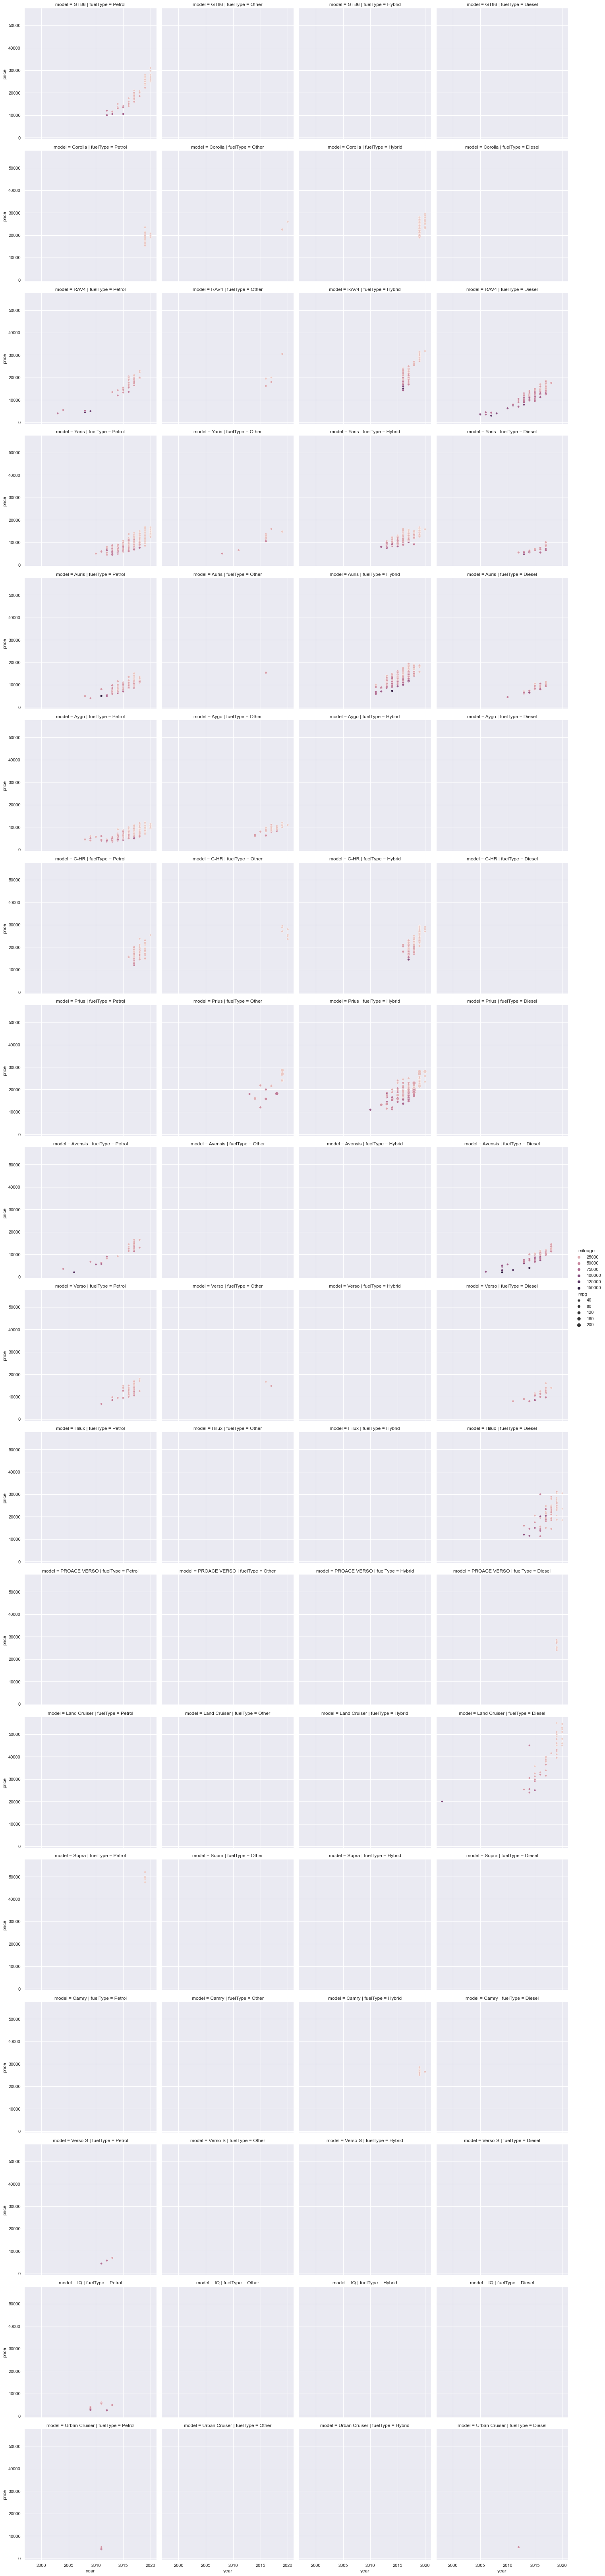

In [31]:
# EDA
sns.set_theme(style="darkgrid")
sns.relplot(x='year', y='price', hue='mileage', size='mpg', row='model', col='fuelType', data=toyota_df_selected_wo_outlier)
#plt.xticks(rotation=45)
plt.show()

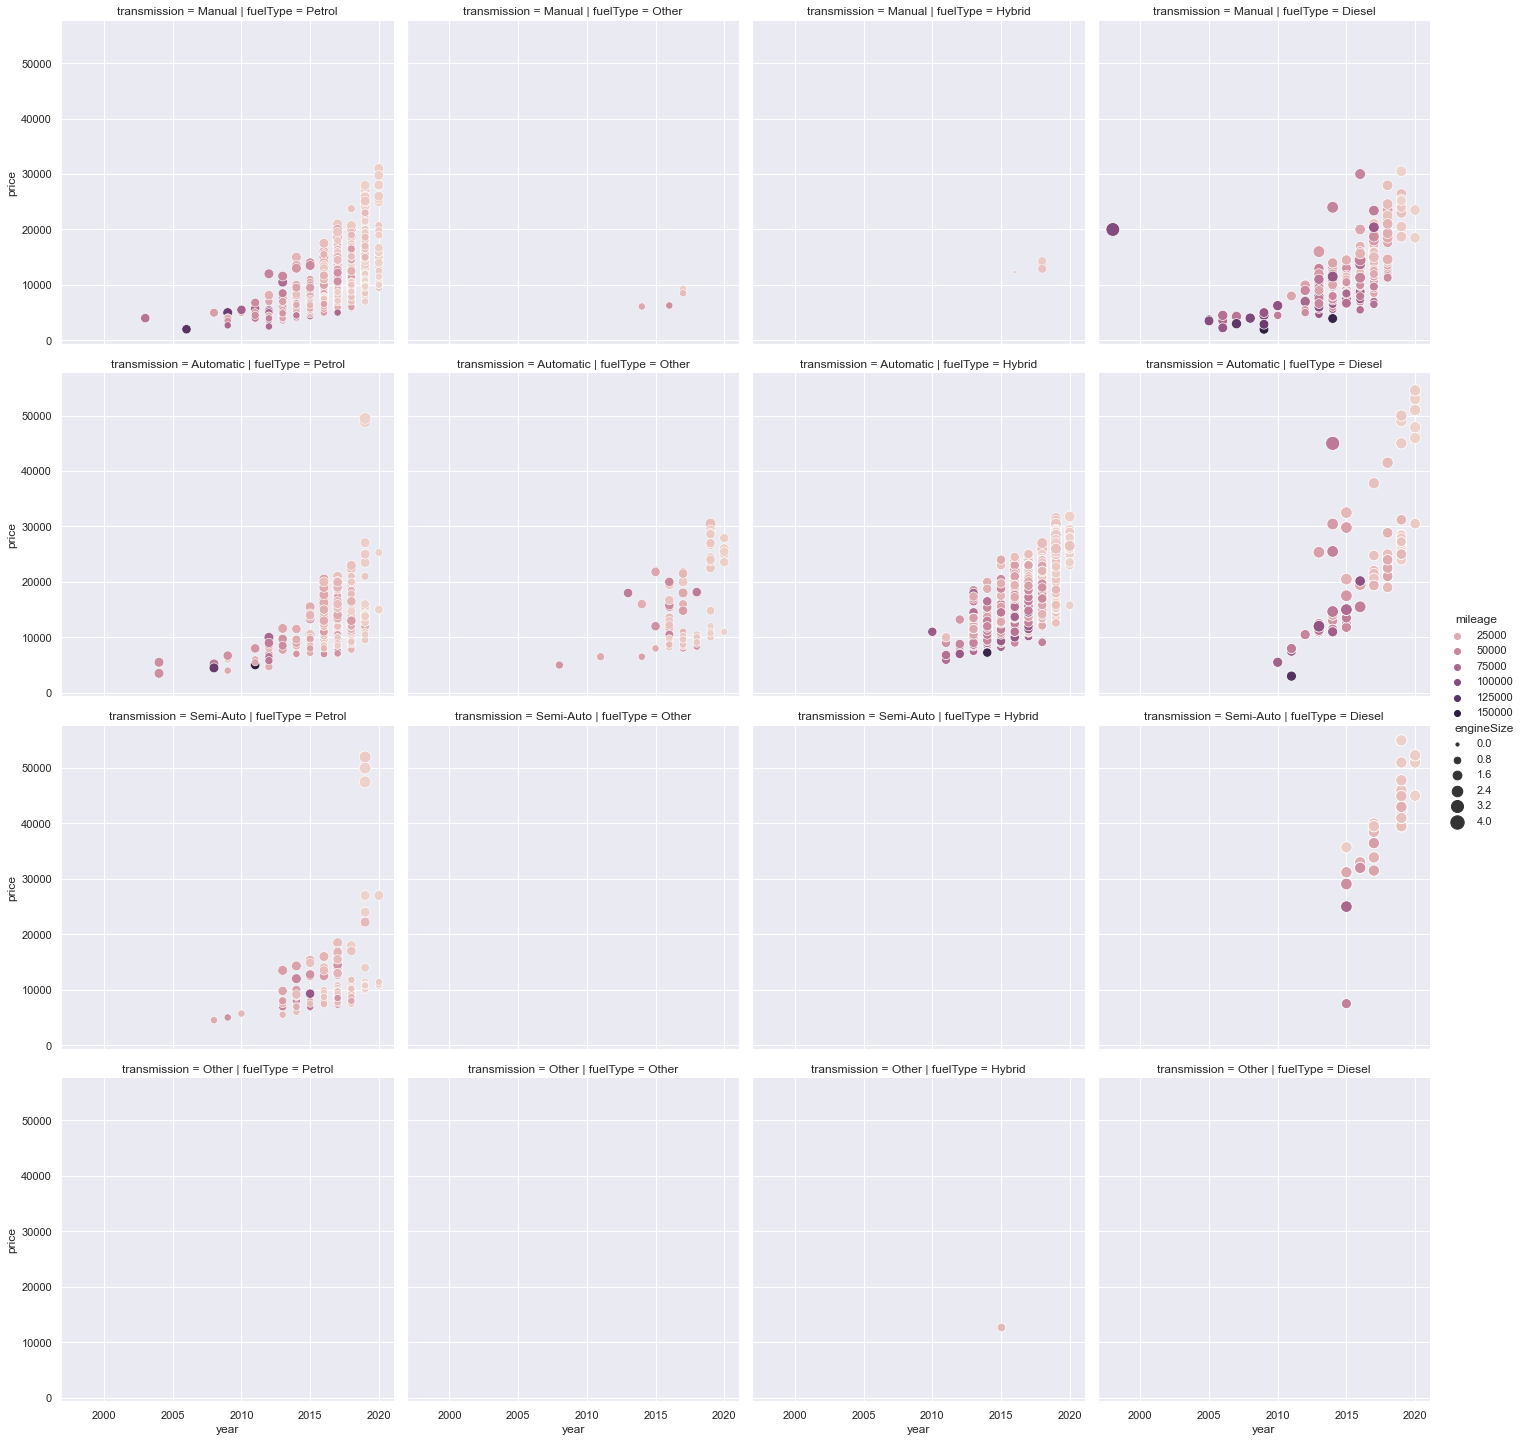

In [32]:
sns.set_theme(style="darkgrid")
#fig, ax = plt.subplots(figsize=(10, 8))
#plt.subplot(2, 2, 1)
sns.relplot(x="year", y='price', hue='mileage', row='transmission', col='fuelType', size='engineSize', sizes=(10, 200), data=toyota_df_selected_wo_outlier)

plt.show()

This plot can make me sure that there are reasonable trends.

In [33]:
#dummies
#model
#transmission
#fuelType
#engineSize
lst_dummycol = ['model', 'transmission', 'fuelType']
toyota_df_selected_wo_outlier_ap = pd.get_dummies(toyota_df_selected_wo_outlier, columns=lst_dummycol, drop_first = False)


In [34]:
# standardization
#lst_cols_std = ['price', 'mileage', 'tax', 'mpg', 'engineSize']
lst_cols_std = ['price', 'mileage', 'tax', 'engineSize']
std_scaler = StandardScaler()
std_scaler.fit(toyota_df_selected_wo_outlier_ap[lst_cols_std])

# transforming our data after fit
toyota_df_selected_wo_outlier_ap_scaled_part = std_scaler.transform(toyota_df_selected_wo_outlier_ap.loc[:, lst_cols_std])

# converting scaled data into a DataFrame
toyota_df_selected_wo_outlier_ap_scaled_part = pd.DataFrame(toyota_df_selected_wo_outlier_ap_scaled_part)

# setting culumn names based on toyota_df_selected_wo_outlier_ap for data transfer
toyota_df_selected_wo_outlier_ap_scaled_part.columns = toyota_df_selected_wo_outlier_ap.loc[:, lst_cols_std].columns
toyota_df_selected_wo_outlier_ap_scaled_part.index = toyota_df_selected_wo_outlier_ap.index

# initializing toyota_df_selected_wo_outlier_ap_scaled for transfering data from toyota_df_selected_wo_outlier_ap_scaled_part
toyota_df_selected_wo_outlier_ap_scaled = toyota_df_selected_wo_outlier_ap.copy()

# inserting standardized data
toyota_df_selected_wo_outlier_ap_scaled.loc[:, lst_cols_std] = toyota_df_selected_wo_outlier_ap_scaled_part


In [35]:
# select columns
#lst_cols_dat = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_Avensis', 'model_Aygo', 'model_C-HR', 'model_Camry',
#       'model_Corolla', 'model_GT86', 'model_Hilux', 'model_IQ',
#       'model_Land Cruiser', 'model_PROACE VERSO', 'model_Prius', 'model_RAV4',
#       'model_Supra', 'model_Urban Cruiser', 'model_Verso', 'model_Verso-S',
#       'model_Yaris', 'transmission_Manual', 'transmission_Other',
#       'transmission_Semi-Auto', 'fuelType_Hybrid', 'fuelType_Other',
#       'fuelType_Petrol']
        
lst_cols_dat = ['year', 'mileage', 'tax', 'engineSize', 'model_Auris', 'model_Avensis', 'model_Aygo', 'model_C-HR',
       'model_Camry', 'model_Corolla', 'model_GT86', 'model_Hilux', 'model_IQ',
       'model_Land Cruiser', 'model_PROACE VERSO', 'model_Prius', 'model_RAV4',
       'model_Supra', 'model_Urban Cruiser', 'model_Verso', 'model_Verso-S',
       'model_Yaris', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']

# Dataset for Linear model and random forest
toyota_explanatory = toyota_df_selected_wo_outlier_ap.loc[:, lst_cols_dat]
toyota_target = toyota_df_selected_wo_outlier_ap.loc[:, 'price']

# Dataset for KNN
toyota_explanatory_std = toyota_df_selected_wo_outlier_ap_scaled.loc[:, lst_cols_dat]
toyota_target_std = toyota_df_selected_wo_outlier_ap_scaled.loc[:, 'price']

In [36]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
            toyota_explanatory,
            toyota_target,
            test_size = 0.20,
            random_state = 219)

In [37]:
# train test split
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
            toyota_explanatory_std,
            toyota_target_std,
            test_size = 0.20,
            random_state = 219)

In [38]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)

# SCORING the results
print('OLS Training Score :', lr_fit.score(X_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  lr_fit.score(X_test, y_test).round(4)) # using R-square

lr_train_score = lr_fit.score(X_train, y_train).round(4)
lr_test_score  = lr_fit.score(X_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.9483
OLS Testing Score  : 0.9407
OLS Train-Test Gap : 0.0076


This linear regression model shows a great performance.<br>
The model stability is great as well.

In [39]:
# Zipping each feature name to its coefficient
lr_model_values = zip(X_train.columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# Checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -1773240.06)
('year', 887.25)
('mileage', -0.06)
('tax', -4.74)
('engineSize', 2962.58)
('model_Auris', -5799.19)
('model_Avensis', -4739.34)
('model_Aygo', -8699.62)
('model_C-HR', -311.62)
('model_Camry', 859.2)
('model_Corolla', -871.84)
('model_GT86', 605.35)
('model_Hilux', 2167.15)
('model_IQ', -6374.25)
('model_Land Cruiser', 18967.87)
('model_PROACE VERSO', 5668.16)
('model_Prius', -862.21)
('model_RAV4', -1233.87)
('model_Supra', 23966.59)
('model_Urban Cruiser', -5365.9)
('model_Verso', -4609.16)
('model_Verso-S', -5820.18)
('model_Yaris', -7547.13)
('transmission_Automatic', 69.91)
('transmission_Manual', -1255.93)
('transmission_Other', 1267.12)
('transmission_Semi-Auto', -81.1)
('fuelType_Diesel', -1644.51)
('fuelType_Hybrid', 1024.77)
('fuelType_Other', 896.62)
('fuelType_Petrol', -276.87)


In [40]:
lr_result_df = pd.DataFrame(data = lr_fit.coef_, index = X_train.columns, columns = ['value'])
#lr_result_df.loc['intercept'] = lr_fit.intercept_
lr_result_df = lr_result_df.reset_index()

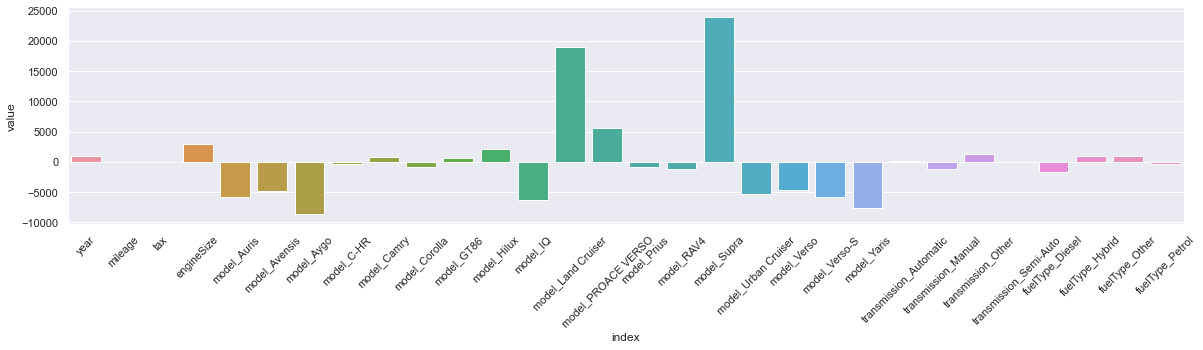

In [41]:
# EDA for coefficients
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(x='index', y='value', data=lr_result_df)
plt.xticks(rotation=45)
plt.show()

In [42]:
# INSTANTIATING a model object
rfr = RandomForestRegressor(n_estimators=1000, criterion='mse',max_depth=10)

# FITTING to the training data
rfr_fit = rfr.fit(X_train, y_train)

# PREDICTING on new data
rfr_pred = rfr_fit.predict(X_test)

# SCORING the results
print('Random Forest Training Score :', rfr_fit.score(X_train, y_train).round(4))  # using R-square
print('Random Forest Testing Score  :',  rfr_fit.score(X_test, y_test).round(4)) # using R-square

rfr_train_score = rfr_fit.score(X_train, y_train).round(4)
rfr_test_score  = rfr_fit.score(X_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('Random Forest Train-Test Gap :', abs(rfr_train_score - rfr_test_score).round(4))
rfr_test_gap = abs(rfr_train_score - rfr_test_score).round(4)


Random Forest Training Score : 0.9796
Random Forest Testing Score  : 0.9608
Random Forest Train-Test Gap : 0.0188


In [43]:
rfr_fit.feature_importances_
feature_importances = pd.DataFrame(rfr_fit.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

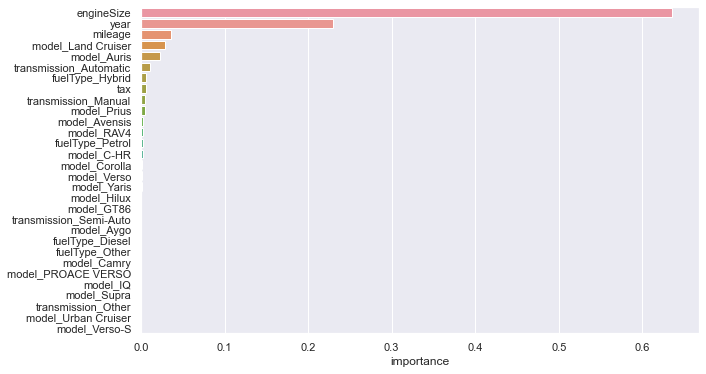

In [44]:
# EDA for engine size
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=feature_importances.index.values, x='importance', data=feature_importances)
plt.show()


In [45]:
# INSTANTIATING a KNN model object
knn_model = KNeighborsRegressor(algorithm = 'auto',
                              leaf_size=50, n_neighbors=10)

# FITTING to the training data
knn_fit = knn_model.fit(X_train_std, y_train_std)

# PREDICTING on new data
knn_pred = knn_fit.predict(X_test_std)

# SCORING the results
print('KNN Training Score:', knn_model.score(X_train_std, y_train_std).round(4))
print('KNN Testing Score :',  knn_model.score(X_test_std, y_test_std).round(4))

# saving scoring data for future use
knn_train_score = knn_model.score(X_train_std, y_train_std).round(4)
knn_test_score  = knn_model.score(X_test_std, y_test_std).round(4)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_train_score - knn_test_score).round(4))
knn_test_gap = abs(knn_train_score - knn_test_score).round(4)

KNN Training Score: 0.9665
KNN Testing Score : 0.9581
KNN Train-Test Gap: 0.0084


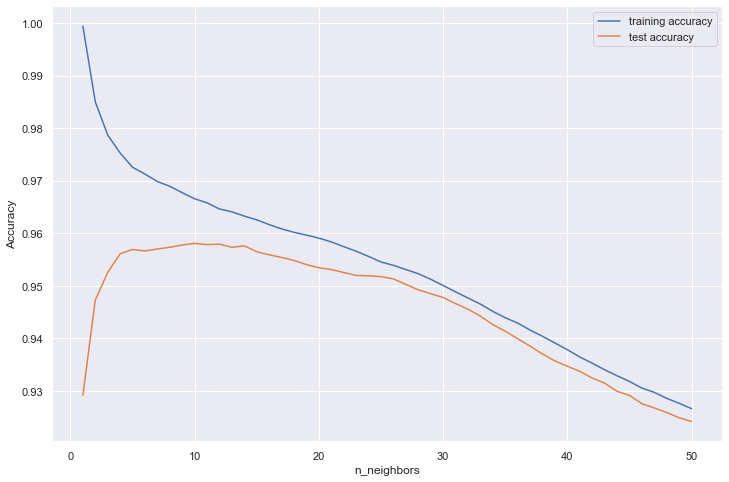

In [46]:
##### Creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_std, y_train_std)
    
    # recording the training set accuracy
    training_accuracy.append(clf.score(X_train_std, y_train_std))
    
    # recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_std, y_test_std))

# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [47]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 10


In [48]:
# comparing results

print(f"""
Model            Train Score      Test Score
-----            -----------      ----------
OLS              {lr_train_score}            {lr_test_score}
Rando Forest     {rfr_train_score}            {rfr_test_score}
KNN_std          {knn_train_score}           {knn_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Random Forest', 'KNN'],
           
    'Training' : [lr_train_score, rfr_train_score, knn_train_score],
           
    'Testing'  : [lr_test_score, rfr_test_score, knn_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, rfr_test_gap, knn_test_gap],
                    
    'Model Size' : [len(lr_model_lst), 'NA', 'NA'],
                    
    'Model' : [lr_model_lst, 'NA', 'NA'],

    'Neighbors' : ['NA', 'NA', 10]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# show model performance
model_performance


Model            Train Score      Test Score
-----            -----------      ----------
OLS              0.9483            0.9407
Rando Forest     0.9796            0.9608
KNN_std          0.9665           0.9581



,Model Type,Training,Testing,Train-Test Gap,Model Size,Model,Neighbors
0,OLS,0.9483,0.9407,0.0076,31,"[(intercept, -1773240.06), (year, 887.25), (mi...",NA
1,Random Forest,0.9796,0.9608,0.0188,NA,NA,NA
2,KNN,0.9665,0.9581,0.0084,NA,NA,10


In [49]:
# prepare dataset for constructing estimated prices

# make dummies
lst_dummycol = ['model', 'transmission', 'fuelType']
toyota_df_selected = pd.get_dummies(toyota_df_selected, columns=lst_dummycol, drop_first = False)

In [50]:
# standardization
lst_cols_std = ['price', 'mileage', 'tax', 'engineSize']
std_scaler = StandardScaler()
std_scaler.fit(toyota_df_selected[lst_cols_std])

# transforming our data after fit
toyota_df_selected_scaled_part = std_scaler.transform(toyota_df_selected.loc[:, lst_cols_std])

# converting scaled data into a DataFrame
toyota_df_selected_scaled_part = pd.DataFrame(toyota_df_selected_scaled_part)

# setting culumn names based on toyota_df_selected for data transfer
toyota_df_selected_scaled_part.columns = toyota_df_selected.loc[:, lst_cols_std].columns
toyota_df_selected_scaled_part.index = toyota_df_selected.index

# initializing toyota_df_selected for transfering data from apprentice_data_scaled_part
toyota_df_selected_scaled = toyota_df_selected.copy()

# inserting standardized data
toyota_df_selected_scaled.loc[:, lst_cols_std] = toyota_df_selected_scaled_part


In [51]:
# predict estimated price based on the models constructed

# columns for predictions
lst_cols_dat = ['year', 'mileage', 'tax', 'engineSize', 'model_Auris', 'model_Avensis', 'model_Aygo', 'model_C-HR',
       'model_Camry', 'model_Corolla', 'model_GT86', 'model_Hilux', 'model_IQ',
       'model_Land Cruiser', 'model_PROACE VERSO', 'model_Prius', 'model_RAV4',
       'model_Supra', 'model_Urban Cruiser', 'model_Verso', 'model_Verso-S',
       'model_Yaris', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']

# random forest regressor
toyota_df['est_price_rfr'] = rfr_fit.predict(toyota_df_selected.loc[:, lst_cols_dat])
toyota_df['gap_rfr'] = toyota_df['price'] - toyota_df['est_price_rfr']

# KNN
toyota_df['est_price_knn'] = knn_fit.predict(toyota_df_selected_scaled.loc[:, lst_cols_dat])
toyota_df['gap_knn'] = toyota_df['price'] - toyota_df['est_price_knn']

# predict estimated price based on the best model
toyota_df['est_price_lr'] = lr_fit.predict(toyota_df_selected.loc[:, lst_cols_dat])
toyota_df['gap_lr'] = toyota_df['price'] - toyota_df['est_price_lr']


In [52]:
#filter for top5models
lst_top5models = ['Yaris', 'Aygo', 'Auris', 'C-HR', 'RAV4']

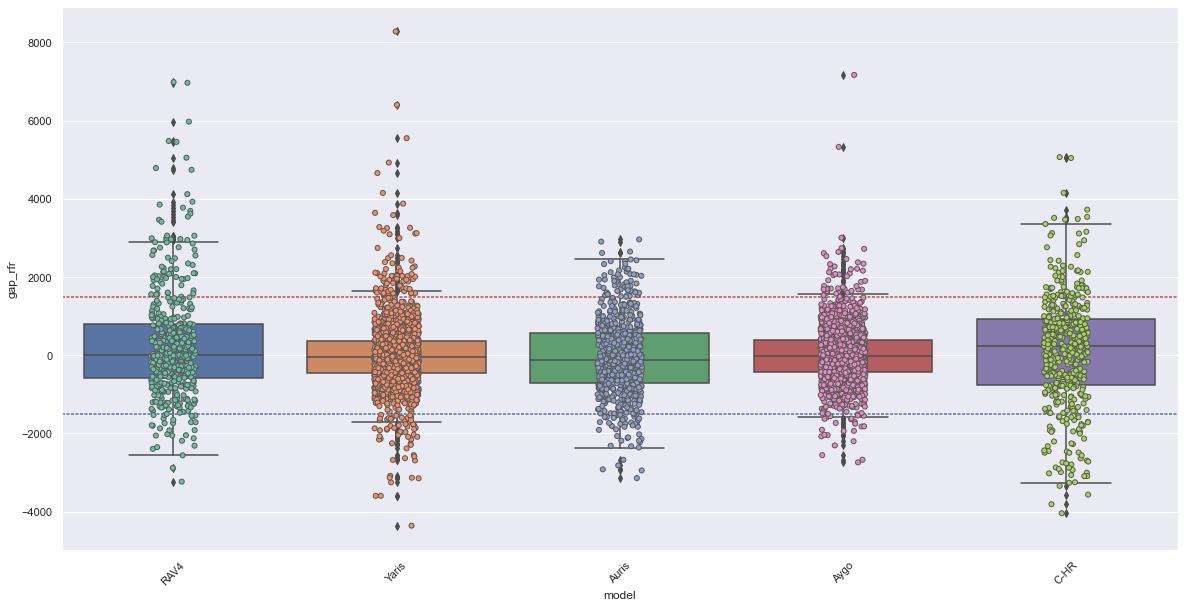

In [53]:
# EDA
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))

sns.stripplot(x="model", y="gap_rfr", data=toyota_df[toyota_df['model'].isin(lst_top5models)], jitter=True, palette="Set2", split=True, linewidth=1,edgecolor='gray')
sns.boxplot(x="model", y='gap_rfr', data=toyota_df[toyota_df['model'].isin(lst_top5models)])
ax.axhline(y=1500, color='r', dashes=(2, 1))
ax.axhline(y=-1500, color='b', dashes=(2, 1))
plt.xticks(rotation=45)

plt.show()

In every model, a majority of the used cars is valued fairly.<br>
However, Yaris shows many outliers a gap both more than 1,500 and less than -1,500.

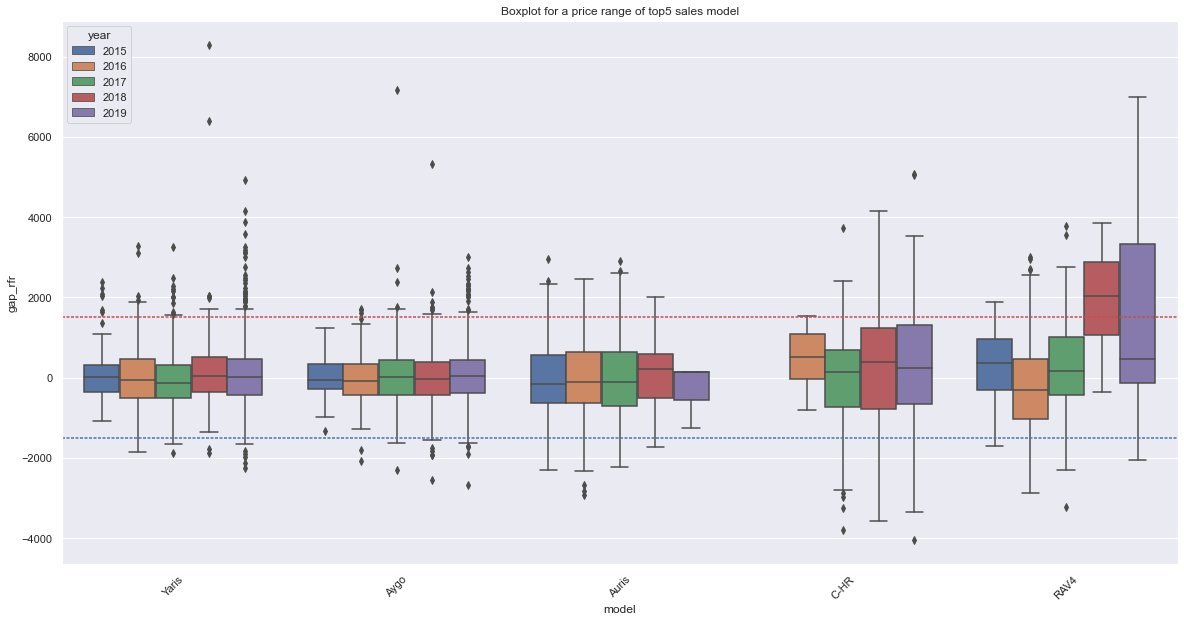

In [54]:
#filter for top5models
lst_top5models = ['Yaris', 'Aygo', 'Auris', 'C-HR', 'RAV4']

# EDA
cond1 = toyota_df['model'].isin(lst_top5models)
cond2 = toyota_df['year'] >= 2015 
cond3 = toyota_df['year'] <= 2019

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))

#sns.stripplot(x="model", y="price", data=toyota_df[toyota_df['model'].isin(lst_top5models)], jitter=True, palette="Set2", split=True, linewidth=1,edgecolor='gray')
sns.boxplot(x="model", y='gap_rfr', hue='year', order=lst_top5models, data=toyota_df[cond1][cond2][cond3])
plt.title('Boxplot for a price range of top5 sales model')
ax.axhline(y=1500, color='r', dashes=(2, 1))
ax.axhline(y=-1500, color='b', dashes=(2, 1))
plt.xticks(rotation=45)

plt.show()

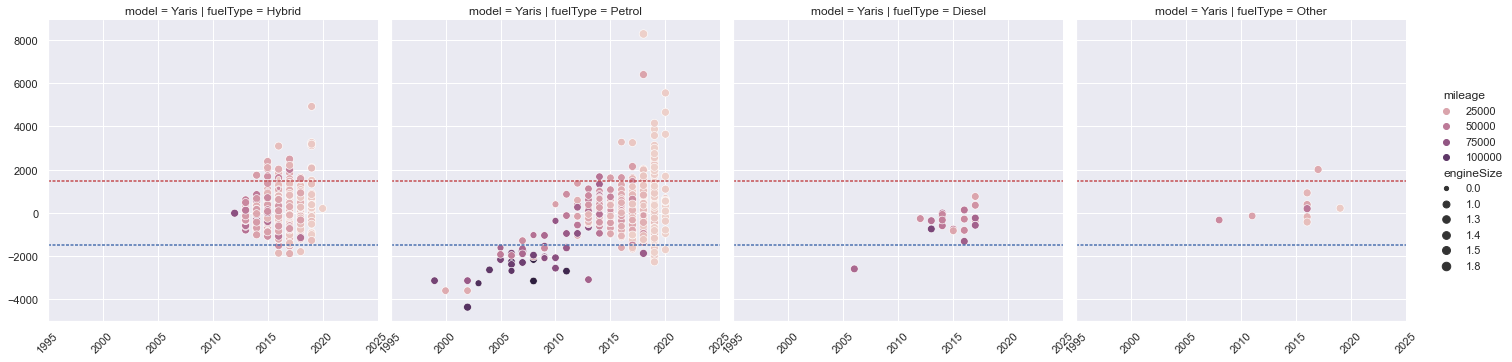

In [55]:
# EDA for Yaris
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_rfr', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Hybrid', 'Petrol', 'Diesel', 'Other'], data=toyota_df[toyota_df['model'].isin(['Yaris'])])
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()

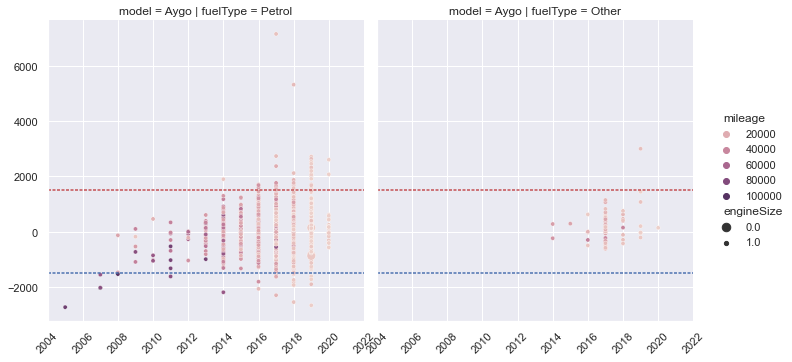

In [56]:
# EDA for Aygo
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_rfr', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Petrol', 'Other'], data=toyota_df[toyota_df['model'].isin(['Aygo'])])
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()

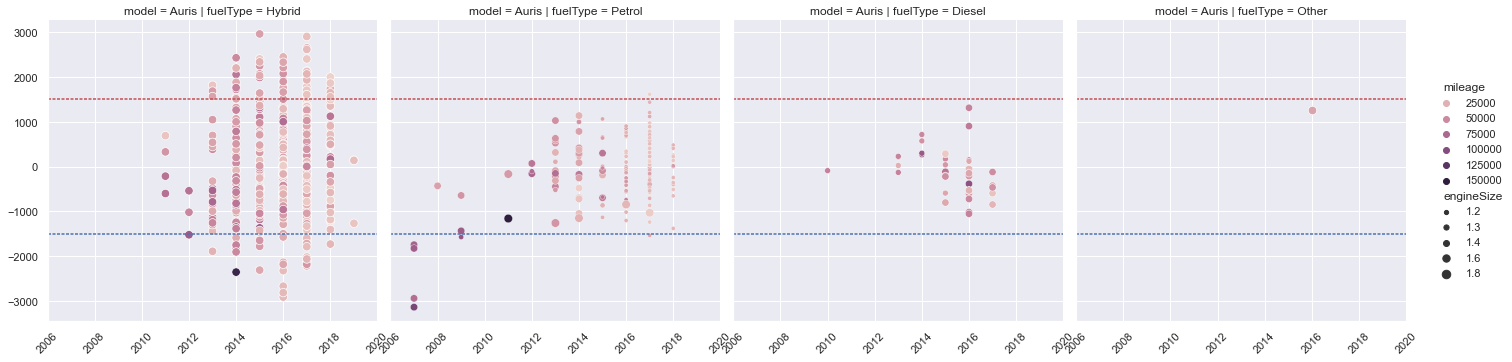

In [57]:
# EDA for Auris
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_rfr', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Hybrid', 'Petrol', 'Diesel', 'Other'], data=toyota_df[toyota_df['model'].isin(['Auris'])])
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()

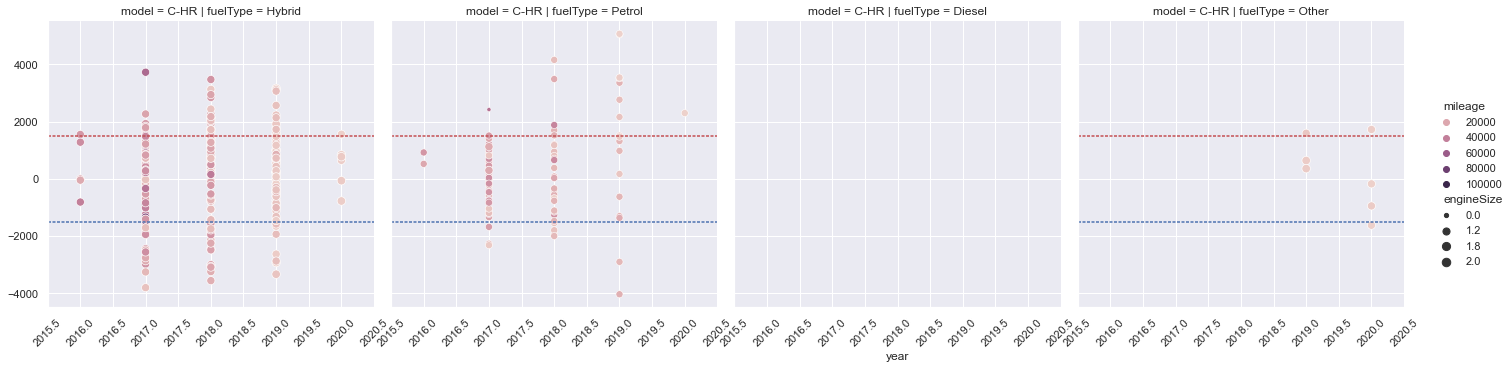

In [58]:
# EDA for C-HR
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_rfr', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Hybrid', 'Petrol', 'Diesel', 'Other'], data=toyota_df[toyota_df['model'].isin(['C-HR'])])
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()

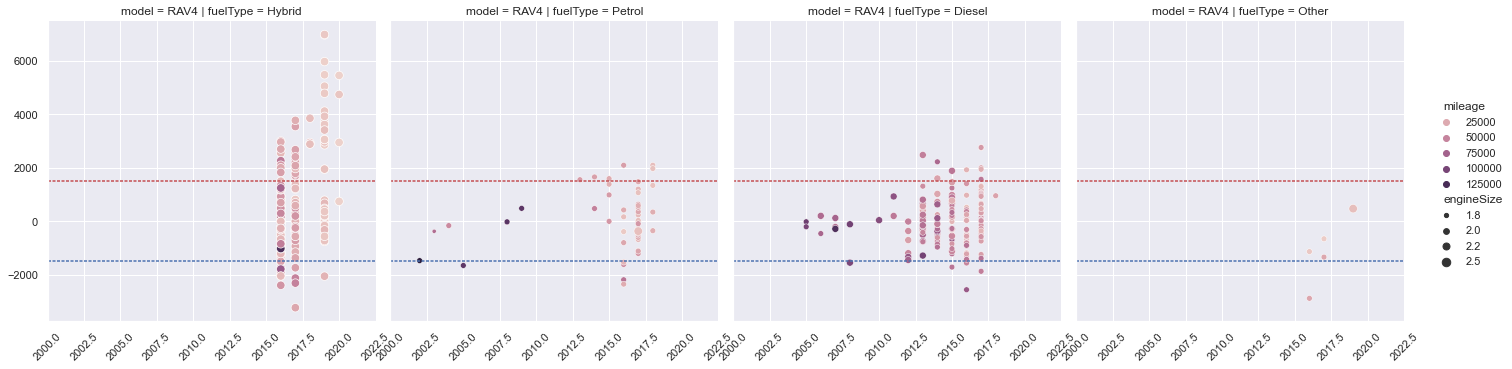

In [59]:
# EDA for RAV4
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_rfr', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Hybrid', 'Petrol', 'Diesel', 'Other'], data=toyota_df[toyota_df['model'].isin(['RAV4'])])
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()

(1)Yaris

 - Yaris made recently is overvalued when fuelType is Petrol
 - Yaris made before 2012 is likely to be undervalued when fuelType is Petrol
 
(2)Aygo

 - Aygo is priced fairly regardless of whenever it was made.

(3)Auris

 - Auris made recently is overvalued when fuelType is Hybrid.

(4)C-HR

 - C-HR made recently after 2015 is both overvalued and undervalued when its fuelType is both Petrol and Hybrid.

(5)RAV4

 - RAV4 is overvalued when its fuelType is Hybrid.


## Appendix

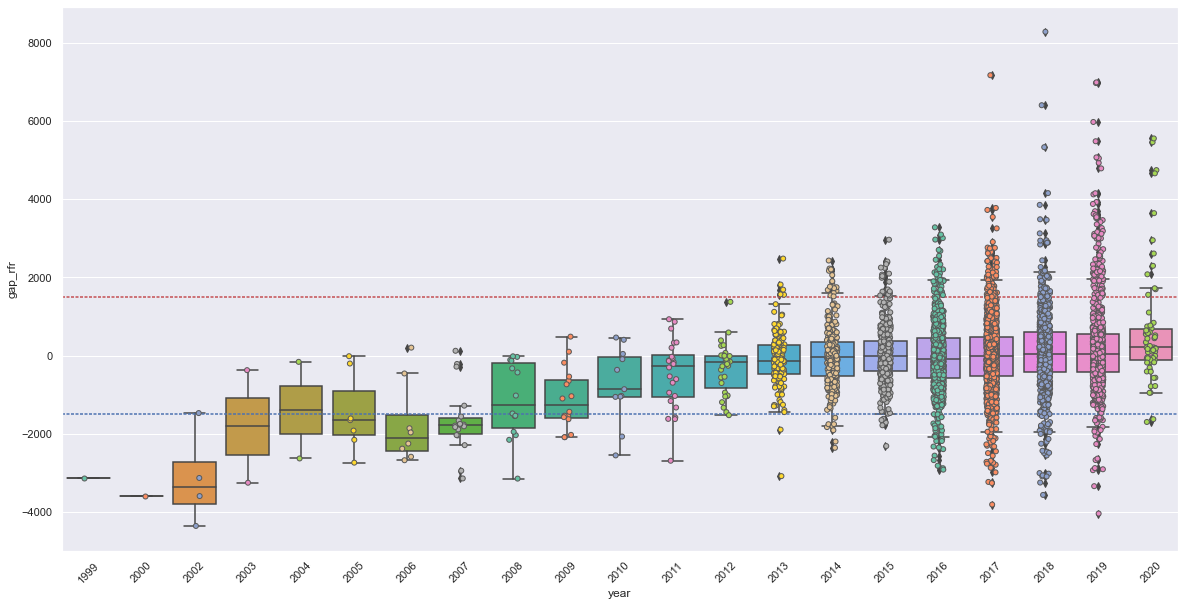

In [60]:
# EDA
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))

sns.stripplot(x="year", y="gap_rfr", data=toyota_df[toyota_df['model'].isin(lst_top5models)], jitter=True, palette="Set2", split=True, linewidth=1,edgecolor='gray')
sns.boxplot(x="year", y='gap_rfr', data=toyota_df[toyota_df['model'].isin(lst_top5models)])
ax.axhline(y=1500, color='r', dashes=(2, 1))
ax.axhline(y=-1500, color='b', dashes=(2, 1))
plt.xticks(rotation=45)

plt.show()

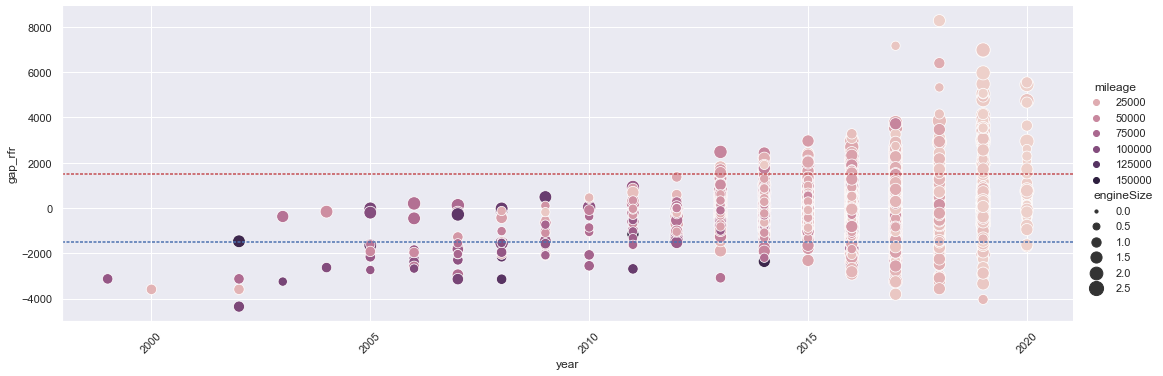

In [61]:
#Evaluating gaps
sns.set_theme(style="darkgrid")
#fig, ax = plt.subplots(figsize=(10, 8))
#plt.subplot(2, 2, 1)
g = sns.relplot(x="year", y='gap_rfr', hue='mileage', size='engineSize', sizes=(10, 200), height=5, aspect=3, data=toyota_df[toyota_df['model'].isin(lst_top5models)])
plt.axhline(y=1500, color='r', dashes=(2, 1))
plt.axhline(y=-1500, color='b', dashes=(2, 1))
plt.xticks(rotation=45)

plt.show()

The graph shows two interesting features. 

 - The present price is overvalued when the used cars are new.
 - The present price is under valued the used cars are old.

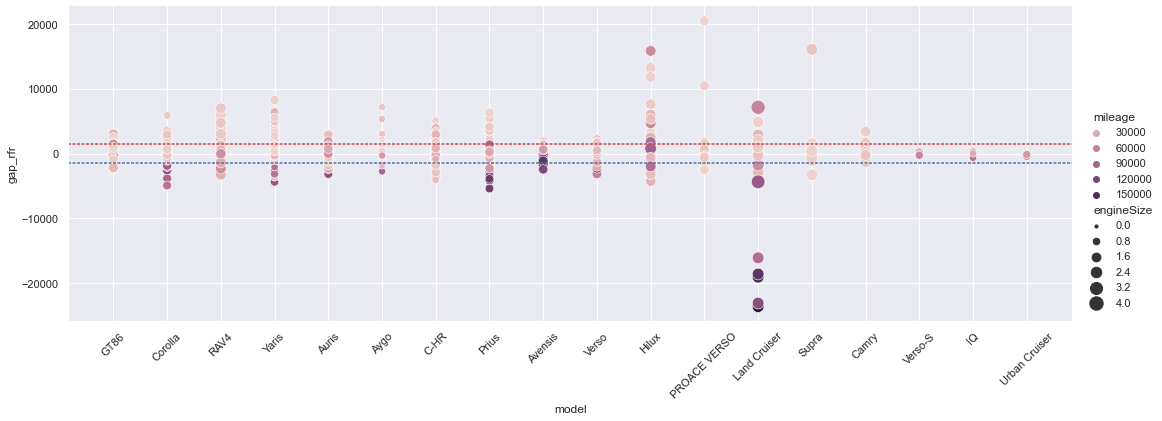

In [62]:
#Evaluating gaps
sns.set_theme(style="darkgrid")
#fig, ax = plt.subplots(figsize=(10, 8))
#plt.subplot(2, 2, 1)
g = sns.relplot(x="model", y='gap_rfr', hue='mileage', size='engineSize', sizes=(10, 200), height=5, aspect=3, data=toyota_df)
plt.axhline(y=1500, color='r', dashes=(2, 1))
plt.axhline(y=-1500, color='b', dashes=(2, 1))
plt.xticks(rotation=45)

plt.show()

This analysis consists of two parts.<br>
The first part is for top sellers of (1)Yaris, (2)Aygo, (3)Auris, (4)C-HR, and (5)RAV4<br>
 - Yaris is overvalued when its mileage is small. On the other hand, it is undervalued when mileage is more than 90,000.
 - RAV4 is overpriced when its mileage is small.  
 
The second part is for others.
 - Corolla shows an interesting figure. When its mileage becomes more than 120,000, they are undervalued.
 - Prius is overvalued when its mileage is small. Simultaneously, it is undervalued when its milege is more than 120,000.
 - Land Cruiser has outliers its gap more than 10,000. 

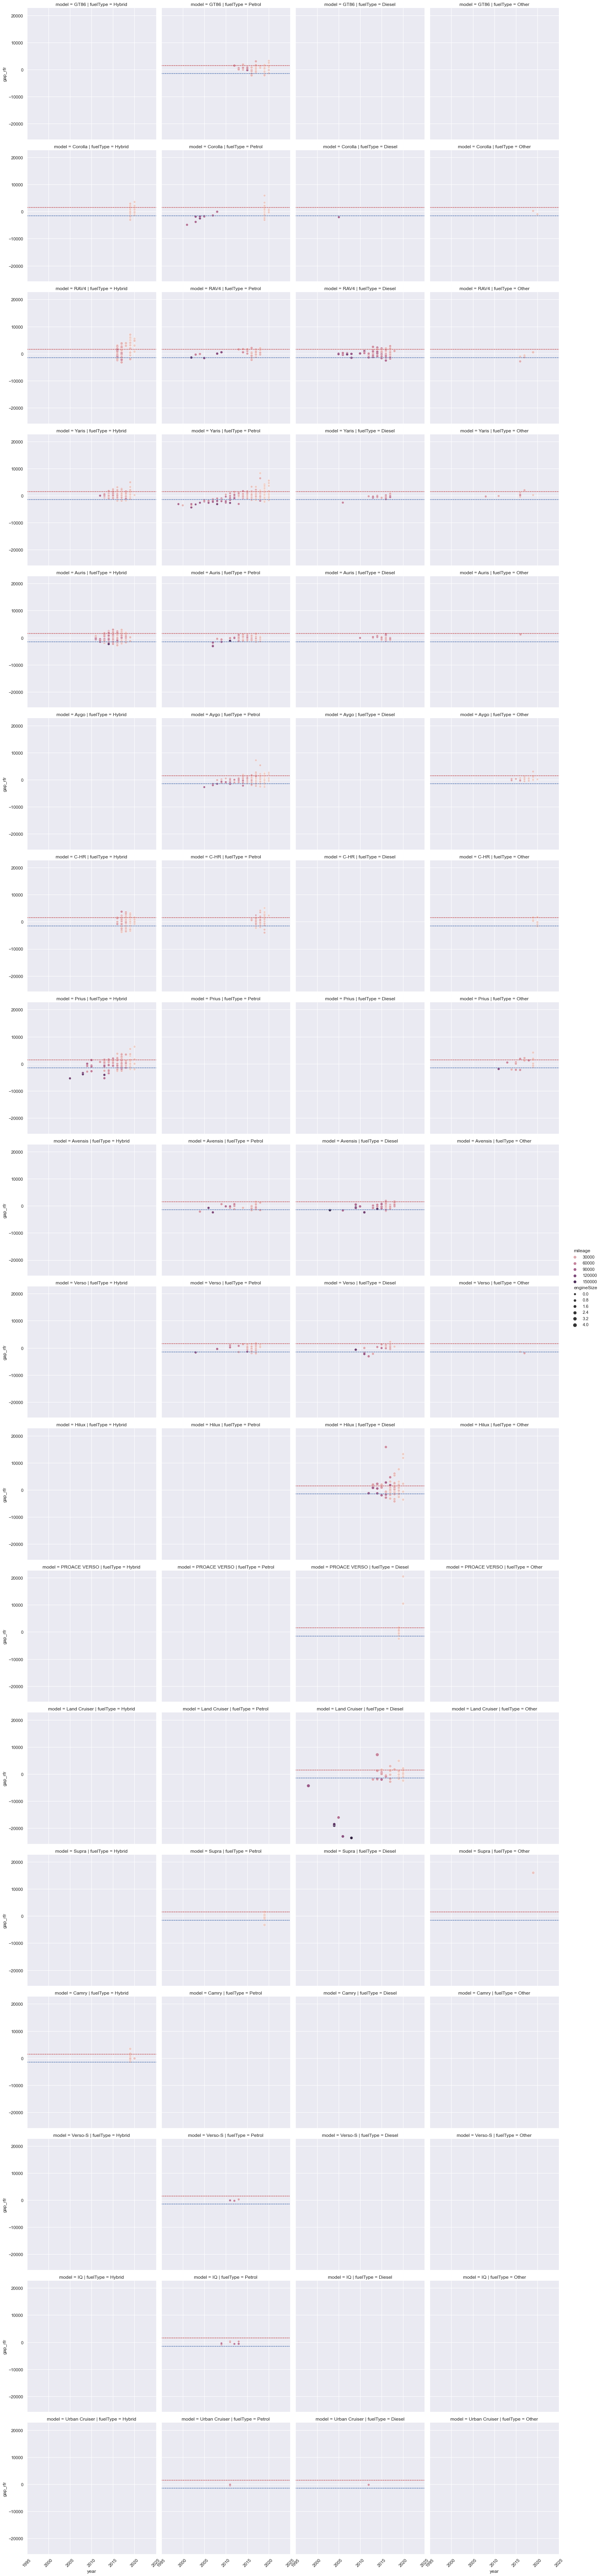

In [63]:
# EDA for all
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_rfr', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Hybrid', 'Petrol', 'Diesel', 'Other'], data=toyota_df)
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()

In [ ]:
# EDA for all
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_lr', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Hybrid', 'Petrol', 'Diesel', 'Other'], data=toyota_df)
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()

In [ ]:
# EDA for all
sns.set_theme(style="darkgrid")
g = sns.relplot(x='year', y='gap_knn', hue='mileage', size='engineSize', row='model', col='fuelType', col_order=['Hybrid', 'Petrol', 'Diesel', 'Other'], data=toyota_df)
g.map(plt.axhline, y=1500, color='r', dashes=(2, 1))
g.map(plt.axhline, y=-1500, color='b', dashes=(2, 1))
g.set_xticklabels(rotation=45)
plt.show()